# Exploratory Data Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pickle
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/giacomomunda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giacomomunda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/giacomomunda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
text_data = pd.read_csv("../datasets/papers.csv")
print(len(text_data))

119453


In [3]:
def get_words_count(data):
    '''
    A function that counts the total number
    of words from some text data given as parameter
    '''
    if isinstance(data, pd.DataFrame):
        text_lst = data["title"].to_list()
        words_count = len(' '.join(text_lst).split())
    else:
        words_count = len(' '.join(data).split())
    
    print(f"Total number of words: {words_count}")

In [4]:
get_words_count(text_data["title"])

Total number of words: 983304


In [5]:
def get_unique_words_count(data):
    '''
    A function that counts the number of 
    unique words from some text data
    given as parameter
    '''
    if isinstance(data, pd.DataFrame):
        text_lst = data["title"].to_list()
        unique_words_count = len(set(' '.join(text_lst).split()))
    else:
        unique_words_count = len(set(' '.join(data).split()))
    
    print(f"Total number of unique words: {unique_words_count}")

In [6]:
get_unique_words_count(text_data["title"])

Total number of unique words: 92843


In [7]:
def get_tokens(data):
    '''
    A function that returns a tokenized list of words
    given some data as a parameter (such as a dataframe or a list of strings)
    '''
    if isinstance(data, pd.DataFrame):
        word_lst = data["title"].astype(str).to_list()
    else:
        word_lst = data
    
    all_tokens = []
    for sent in word_lst:
        tokens = nltk.word_tokenize(sent)
        all_tokens.extend(tokens)
        
    return all_tokens

In [8]:
def word_frequencies(word_list:list):
    '''
    A function that takes as a parameter a list 
    of tokens and computes their frequencies without 
    stopwords and punctuations and plots the distribution
    '''
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [w for w in word_list if not w.lower() in stop_words and not w in punctuation]
    fdist = FreqDist(filtered_tokens)
    print(len(filtered_tokens))

    plt.figure(figsize=(20, 10))
    fdist.plot(70, cumulative=False)

755113


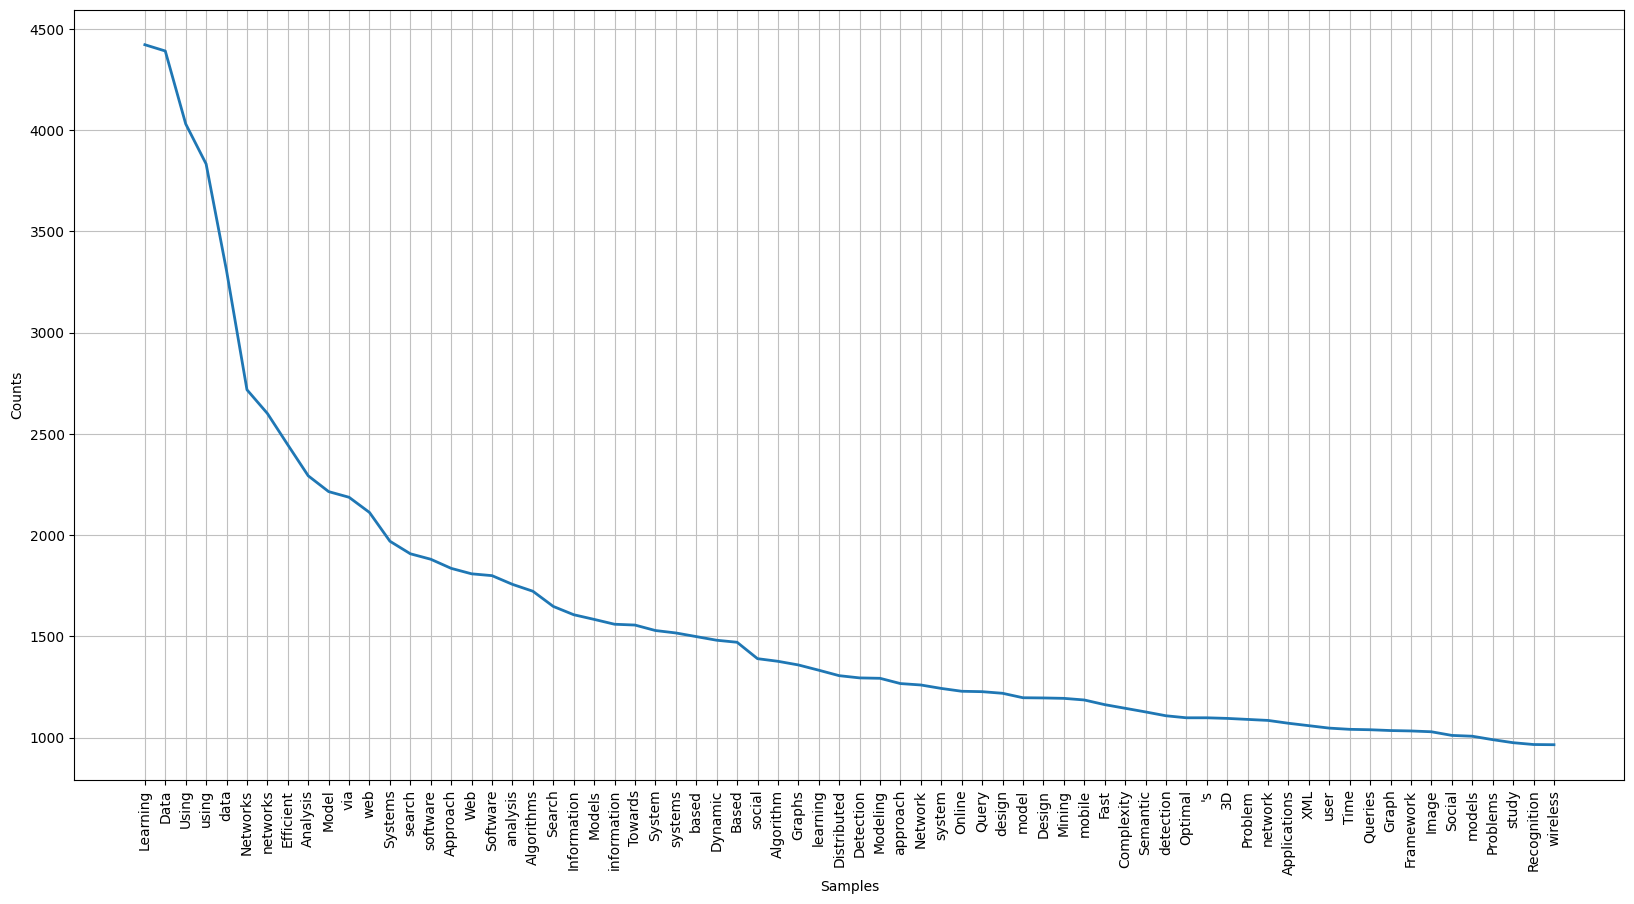

In [9]:
word_frequencies(get_tokens(text_data["title"]))

## Clustering

In [12]:
with open("../embeddings/embeddings_papers.pkl", 'rb') as f:
    embeddings = pickle.load(f)

In [14]:
embedded_documents = np.array(embeddings)
num_clusters = 20

In [35]:
k_means = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = k_means.fit_predict(embedded_documents)

/Users/giacomomunda/Documents/MSc Multilingual Technologies/2nd Semester/Information Extraction and Retrieval/IR_project/Semantic_Retrieval/retrieval-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# dimensionality reduction using PCA
pca = PCA(n_components=2, random_state=42)
pca_embeddings = pca.fit_transform(embedded_documents)

In [39]:
print(pca_embeddings)

[[-0.25088075 -0.16471745]
 [-0.04195853  0.05584067]
 [ 0.14208053 -0.03448348]
 ...
 [ 0.23662513  0.0241325 ]
 [-0.01216512  0.04098134]
 [ 0.21172178 -0.03590226]]


In [40]:
# dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(embedded_documents)

In [41]:
print(tsne_embeddings)

[[-88.2073    -15.649546 ]
 [  4.8247094  74.2639   ]
 [-10.26929    13.289242 ]
 ...
 [ 26.053478  -54.739597 ]
 [ 25.457546  -97.65826  ]
 [ 14.411513   53.865997 ]]


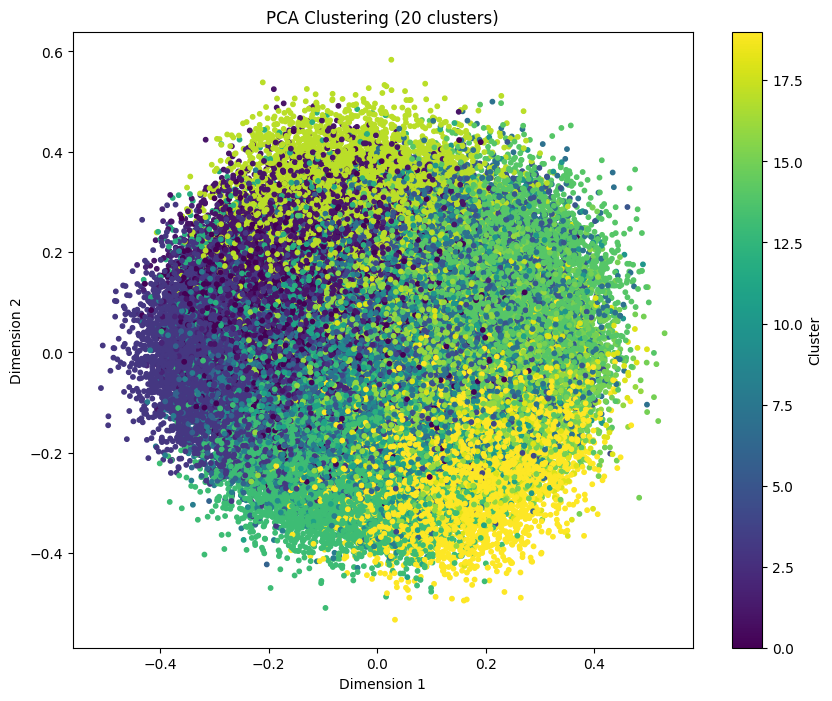

In [46]:
# Plot the clusters in a scatter plot
point_size = 10

plt.figure(figsize=(10, 8))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=cluster_labels, cmap='viridis', s=point_size)
plt.title('PCA Clustering (20 clusters)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()